# Working With Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
import matplotlib as mpl
mpl.style.use('clean') # this loads my personal plotting settings
# https://raw.githubusercontent.com/iamlemec/dotfiles/master/python/clean.mplstyle
%matplotlib inline

In [3]:
# if you have an HD display
%config InlineBackend.figure_format = 'retina'

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [18]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.662992
11    0.932900
12    0.688106
13    0.451034
14    0.444995
15    0.367021
16    0.245279
17    0.138949
18    0.821316
19    0.605566
dtype: float64

In [19]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.66299232 0.93289986 0.68810568 0.45103375 0.44499477 0.36702116
 0.2452786  0.13894935 0.8213165  0.60556598]


In [20]:
s.describe()

count    10.000000
mean      0.535816
std       0.251498
min       0.138949
25%       0.386515
50%       0.528300
75%       0.681827
max       0.932900
dtype: float64

In [21]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.662992,-0.381565
11,0.932900,1.364157
12,0.688106,-1.820664
13,0.451034,0.333084
14,0.444995,0.350434


In [22]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.535816,-0.008277
std,0.251498,1.132794
min,0.138949,-2.078418
25%,0.386515,-0.301751
50%,0.528300,0.341759
75%,0.681827,0.679864
max,0.932900,1.364157


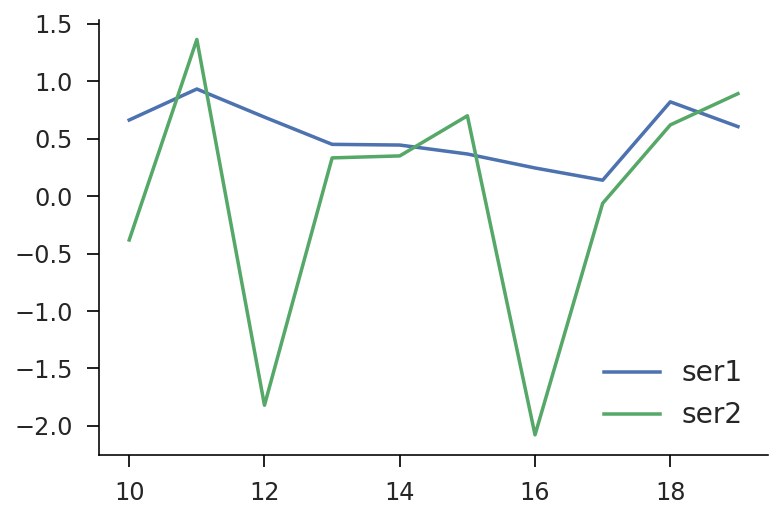

In [23]:
df.plot();

In [24]:
df['ser1']

10    0.662992
11    0.932900
12    0.688106
13    0.451034
14    0.444995
15    0.367021
16    0.245279
17    0.138949
18    0.821316
19    0.605566
Name: ser1, dtype: float64

In [25]:
df['ser1'] > 0.5

10     True
11     True
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19     True
Name: ser1, dtype: bool

In [26]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
10,0.662992,-0.381565
11,0.932900,1.364157
12,0.688106,-1.820664
18,0.821316,0.620366
19,0.605566,0.892446


In [27]:
df.query('ser1 > 0.5')

,ser1,ser2
10,0.662992,-0.381565
11,0.932900,1.364157
12,0.688106,-1.820664
18,0.821316,0.620366
19,0.605566,0.892446


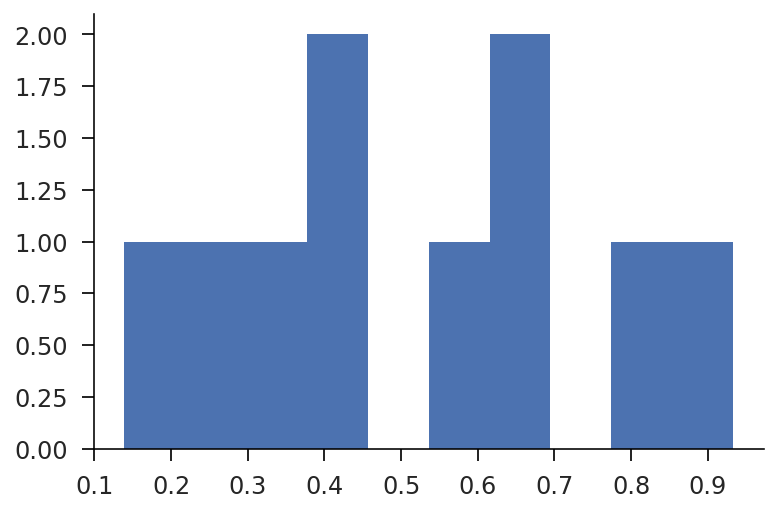

In [28]:
df['ser1'].hist(grid=False);

## Grouping Data

In [29]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [30]:
df.head(10)

,block,value
0,1,0.207657
1,3,0.446677
2,2,0.101989
3,3,0.298734
4,3,0.711562
5,3,0.484011
6,2,0.456654
7,0,-0.171809
8,1,0.301250
9,1,0.138189


In [31]:
df.groupby('block').size()

block
0    26
1    20
2    23
3    31
dtype: int64

In [32]:
df.groupby('block')['value'].mean()

block
0    0.081527
1    0.187535
2    0.460240
3    0.414713
Name: value, dtype: float64

In [33]:
df.groupby('block')['value'].std()

block
0    0.237260
1    0.089273
2    0.508057
3    0.184930
Name: value, dtype: float64

In [34]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.192759
1    0.066332
2    0.371965
3    0.153546
Name: value, dtype: float64

In [35]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.081527,0.237260,0.192759
1,0.187535,0.089273,0.066332
2,0.460240,0.508057,0.371965
3,0.414713,0.184930,0.153546


## Time Series

In [36]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [37]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [38]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,-0.002750
2016-01-02,0.005700
2016-01-03,0.002598
2016-01-04,0.003805
2016-01-05,0.011825


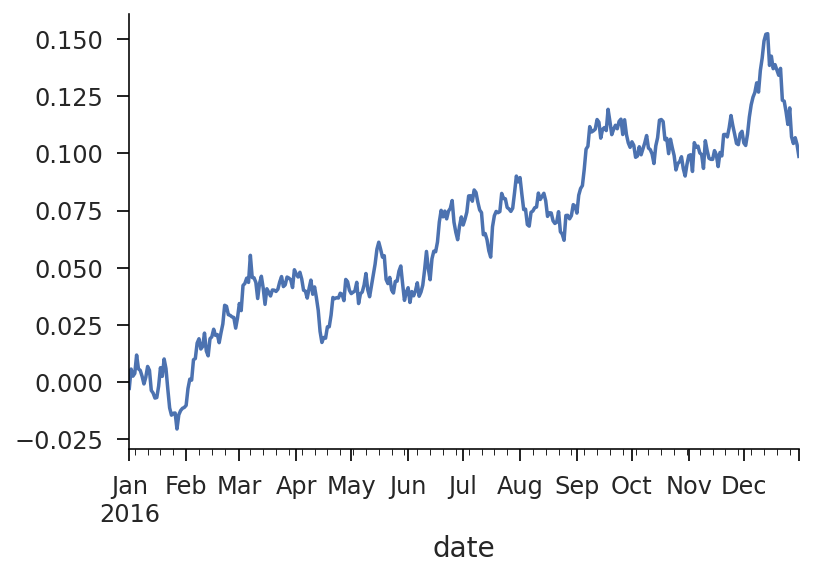

In [39]:
df['price'].plot();

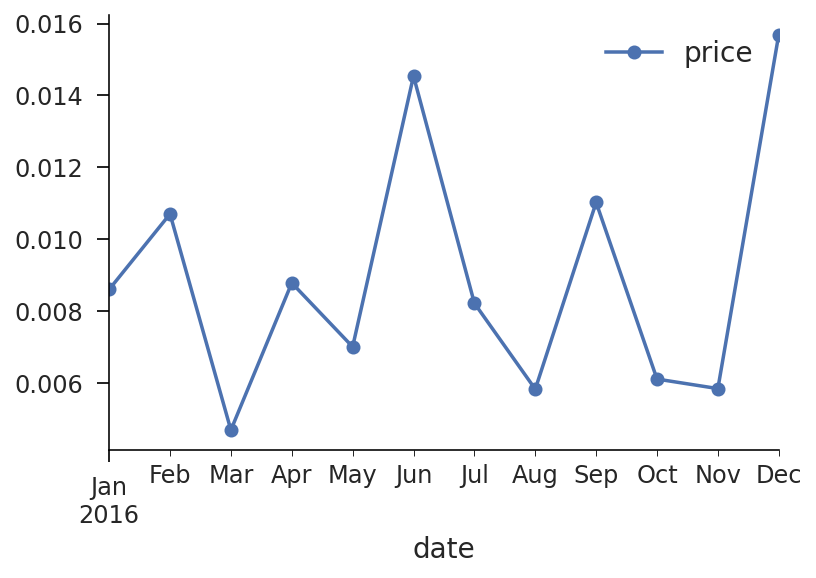

In [41]:
df.groupby(pd.Grouper(freq='MS')).std().plot(marker='o');

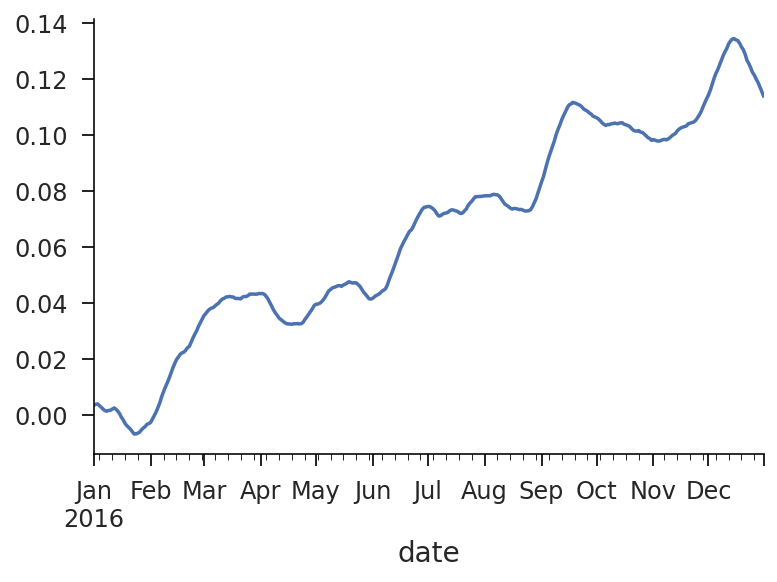

In [42]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [43]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [44]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [45]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

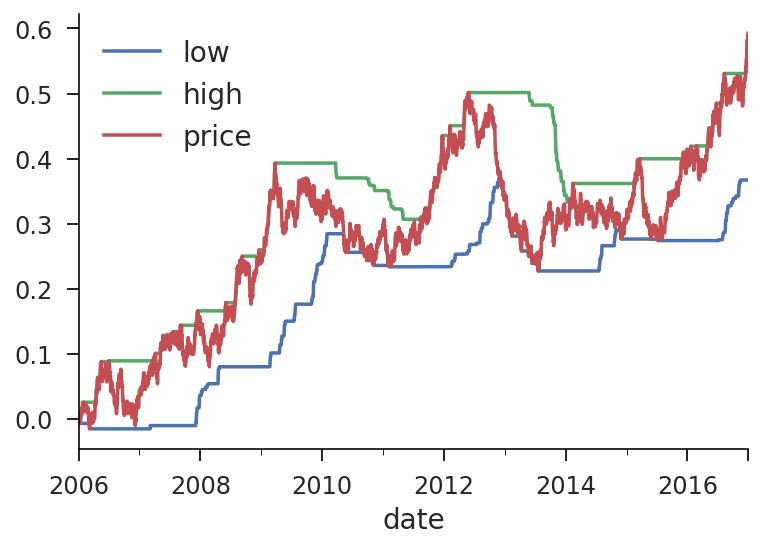

In [46]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

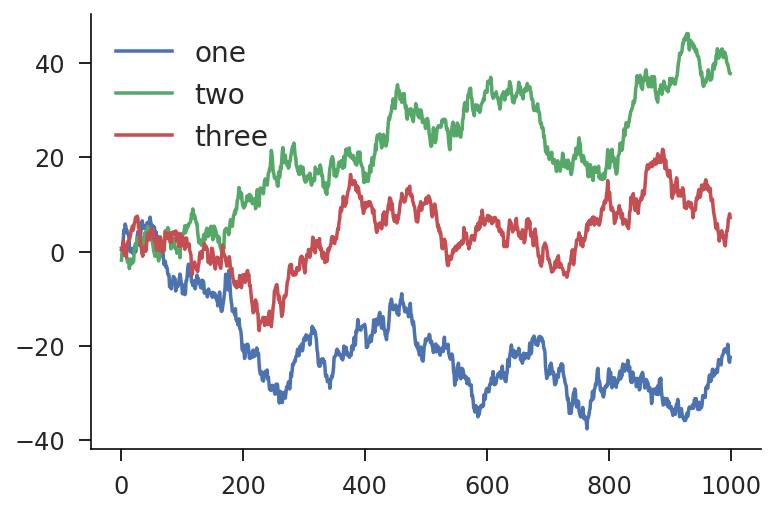

In [48]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

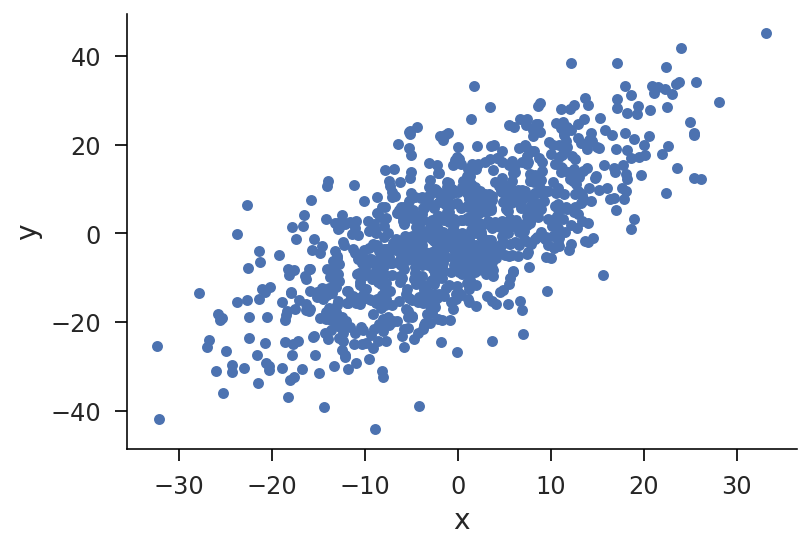

In [49]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

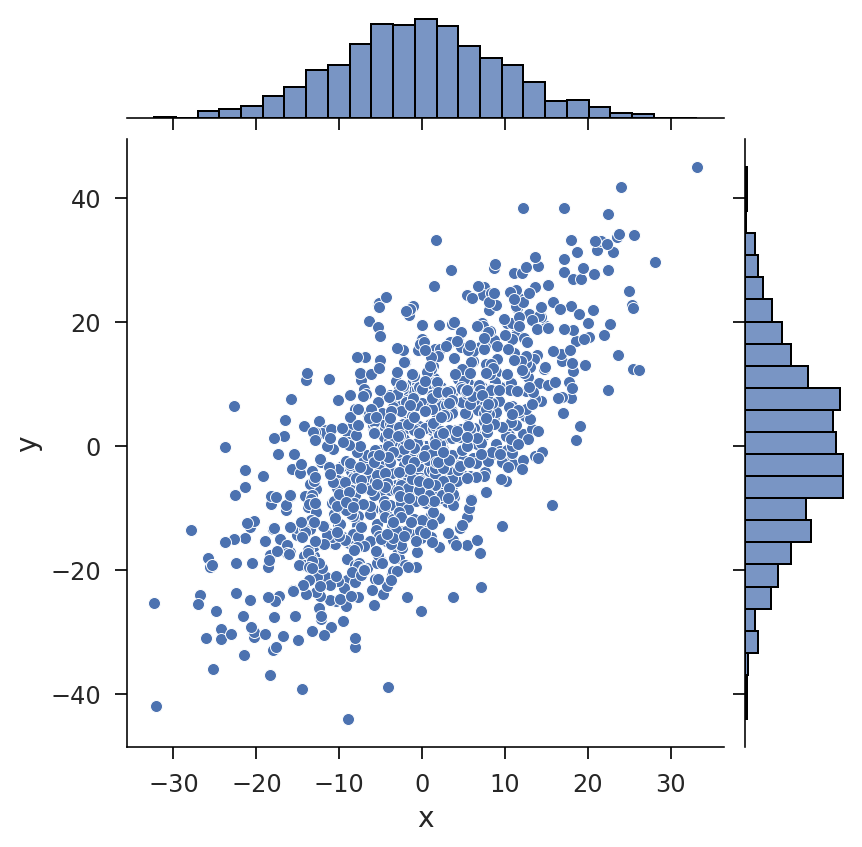

In [52]:
sns.jointplot('x', 'y', data=df);

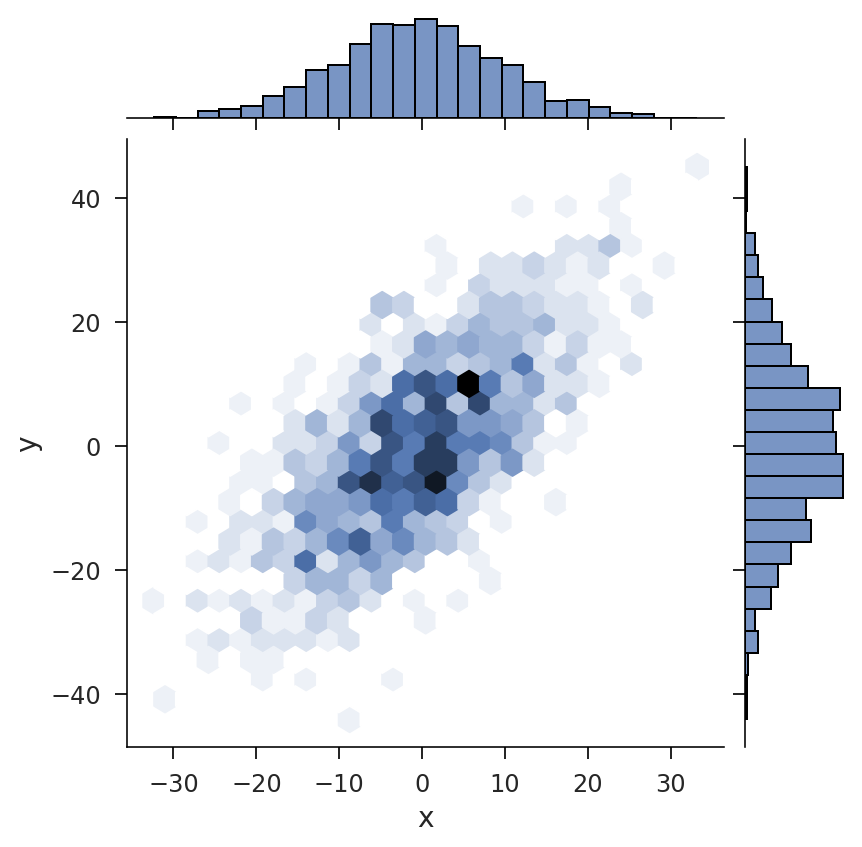

In [53]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Indexing

In [54]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.061363
11,1,0.626258
12,2,0.954289
13,3,0.714295
14,4,0.833336
15,5,0.686515
16,6,0.952347
17,7,0.320034
18,8,0.275450
19,9,0.531029


In [55]:
# slicing on index
df.loc[14]

a    4.000000
b    0.833336
Name: 14, dtype: float64

In [56]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.833336
Name: 14, dtype: float64

In [57]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [58]:
# selecting
df[df['a']>5]

,a,b
16,6,0.952347
17,7,0.320034
18,8,0.275450
19,9,0.531029


In [59]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.833336
15,5,0.686515
16,6,0.952347
17,7,0.320034


In [60]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [61]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.833336
15,5,0.686515
16,6,0.952347
17,7,0.320034


## Joining

In [62]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [63]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,4,0.763338
1,3,0.071967
2,0,0.883877
3,9,0.202178
4,8,0.720704


In [64]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,4,0.763338,8
1,3,0.071967,6
2,0,0.883877,0
3,9,0.202178,18
4,8,0.720704,16


In [65]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,4,0.763338,8,True
1,3,0.071967,6,True
2,0,0.883877,0,True
3,9,0.202178,18,True
4,8,0.720704,16,True


In [66]:
print(final['check'].all())

True


### Stack and unstack (and some pivot)

In [67]:
a = [0, 1, 2]
b = [1, 2, 3]
list(zip(a, b))

[(0, 1), (1, 2), (2, 3)]

In [68]:
# this constructs a family structure table
M, N = 5, 12
from itertools import cycle
cmap = list(zip(cycle(range(M)), range(100, 100+N), np.random.rand(N)))
pmap = pd.DataFrame(cmap, columns=['pid', 'cid', 'income'])
pmap = pmap.sort_values('pid').reset_index(drop=True)
pmap

,pid,cid,income
0,0,100,0.528094
1,0,105,0.833874
2,0,110,0.424312
3,1,101,0.057198
4,1,106,0.610741
5,1,111,0.735839
6,2,102,0.866691
7,2,107,0.470195
8,3,103,0.583109
9,3,108,0.939885


In [69]:
# tabulate the order of each child
pmap['order'] = pmap.groupby('pid').cumcount().apply(lambda x: f'child{x}')
ptab = pmap.set_index(['pid', 'order'])
ptab

cid    income
pid order                
0   child0  100  0.528094
    child1  105  0.833874
    child2  110  0.424312
1   child0  101  0.057198
    child1  106  0.610741
    child2  111  0.735839
2   child0  102  0.866691
    child1  107  0.470195
3   child0  103  0.583109
    child1  108  0.939885
4   child0  104  0.469384
    child1  109  0.353948

In [70]:
fam = ptab.unstack(level=1)
fam

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.528094  0.833874  0.424312
1      101.0  106.0  111.0  0.057198  0.610741  0.735839
2      102.0  107.0    NaN  0.866691  0.470195       NaN
3      103.0  108.0    NaN  0.583109  0.939885       NaN
4      104.0  109.0    NaN  0.469384  0.353948       NaN

In [71]:
# the reverse operation gives us (almost) what we started with
fam.stack(level='order')

cid    income
pid order                  
0   child0  100.0  0.528094
    child1  105.0  0.833874
    child2  110.0  0.424312
1   child0  101.0  0.057198
    child1  106.0  0.610741
    child2  111.0  0.735839
2   child0  102.0  0.866691
    child1  107.0  0.470195
3   child0  103.0  0.583109
    child1  108.0  0.939885
4   child0  104.0  0.469384
    child1  109.0  0.353948

In [73]:
# we can do this with pivot too
ptab.reset_index().pivot('pid', 'order', ['cid', 'income'])

cid                  income                    
order child0 child1 child2    child0    child1    child2
pid                                                     
0      100.0  105.0  110.0  0.528094  0.833874  0.424312
1      101.0  106.0  111.0  0.057198  0.610741  0.735839
2      102.0  107.0    NaN  0.866691  0.470195       NaN
3      103.0  108.0    NaN  0.583109  0.939885       NaN
4      104.0  109.0    NaN  0.469384  0.353948       NaN

## Networks

In [74]:
import networkx as nx

In [75]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,3,1,0.748777
1,5,3,0.151479
2,0,9,1.020499
3,9,2,0.331205
6,7,1,0.136664


In [76]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

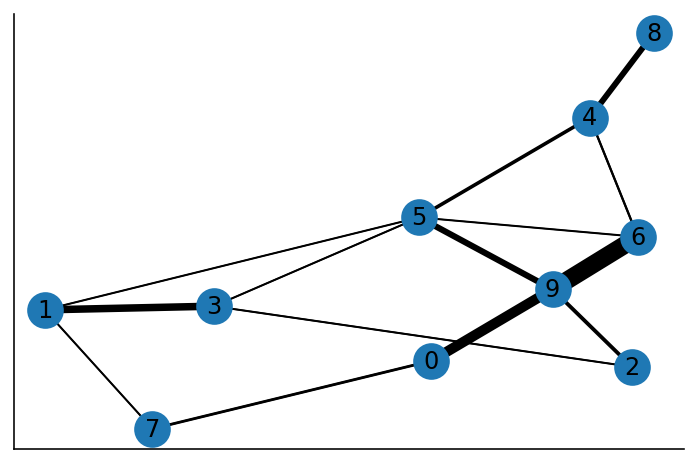

In [77]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [78]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.32109600742342476,
 1: 0.02871988518376149,
 2: 0.12130722960076225,
 3: 0.03475417239512495,
 4: 0.10452320502789232,
 5: 0.24476062504408835,
 6: 0.5737915339107097,
 7: 0.04200183780847488,
 8: 0.027460870437604618,
 9: 0.6910581622599682}

## Input/Output

In [79]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('test.csv', index=False)

In [80]:
!head test.csv

one,two,three
0.34965413322430755,-0.07447915974540519,-0.32960306989767457
-1.5930399001053859,-0.9834956625405009,-0.23493306368163291
0.3869378871403919,-0.543433576229368,-1.6004049185235232
-2.3986832986120197,-0.2620395548980497,-1.9066345145233248
-1.214790804680633,-0.6109600864152789,-2.6061805434034646
-1.7397012316948246,-0.30079553635514594,-1.473123223361894
-0.8325903542797864,-0.8491108066550319,-1.44661039248937
-1.787122238690409,-0.3088148403531574,-0.9338165681897089
-0.5924172818801194,-0.9895150018309685,-0.7332982878019246


In [81]:
df = pd.read_csv('test.csv')
df.head()

,one,two,three
0,0.349654,-0.074479,-0.329603
1,-1.593040,-0.983496,-0.234933
2,0.386938,-0.543434,-1.600405
3,-2.398683,-0.262040,-1.906635
4,-1.214791,-0.610960,-2.606181


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

## External Data

In [83]:
import pandas_datareader as pdr

In [84]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


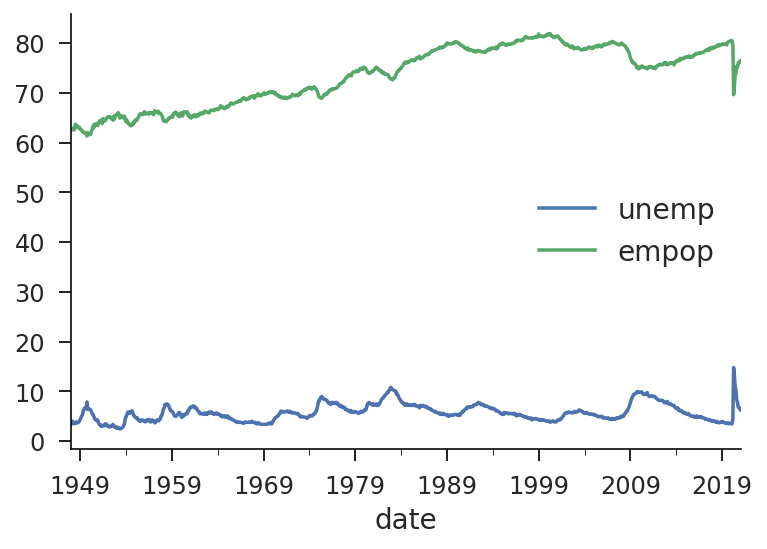

In [85]:
emp.plot();

In [108]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df.reset_index()).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

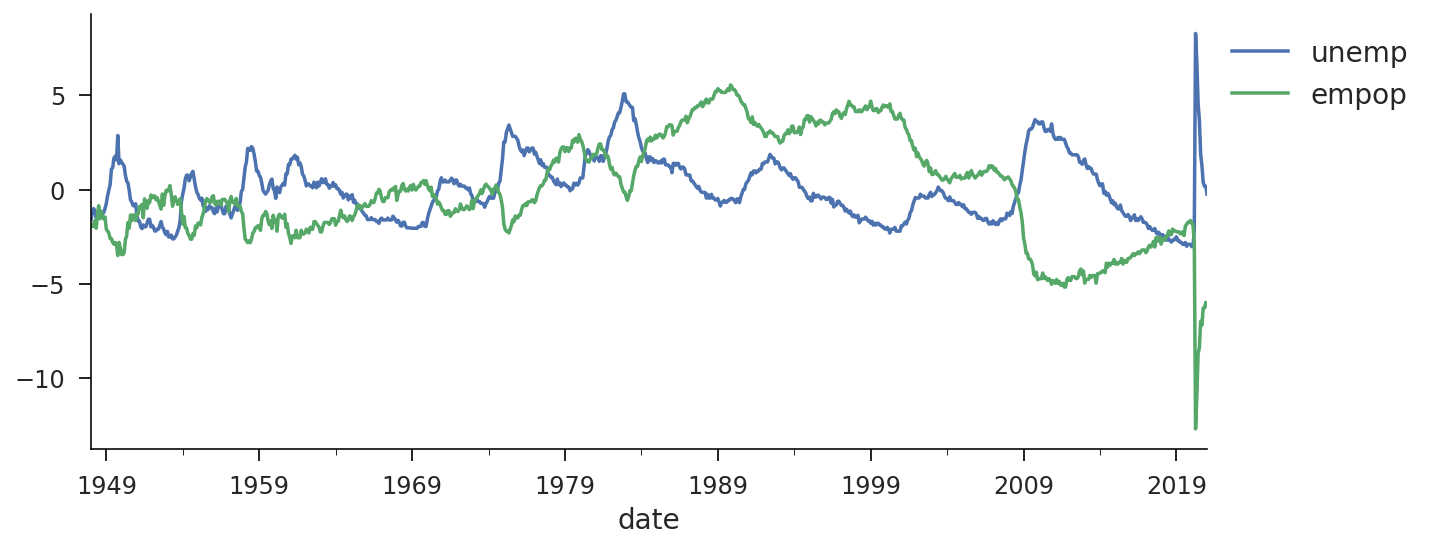

In [109]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [110]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

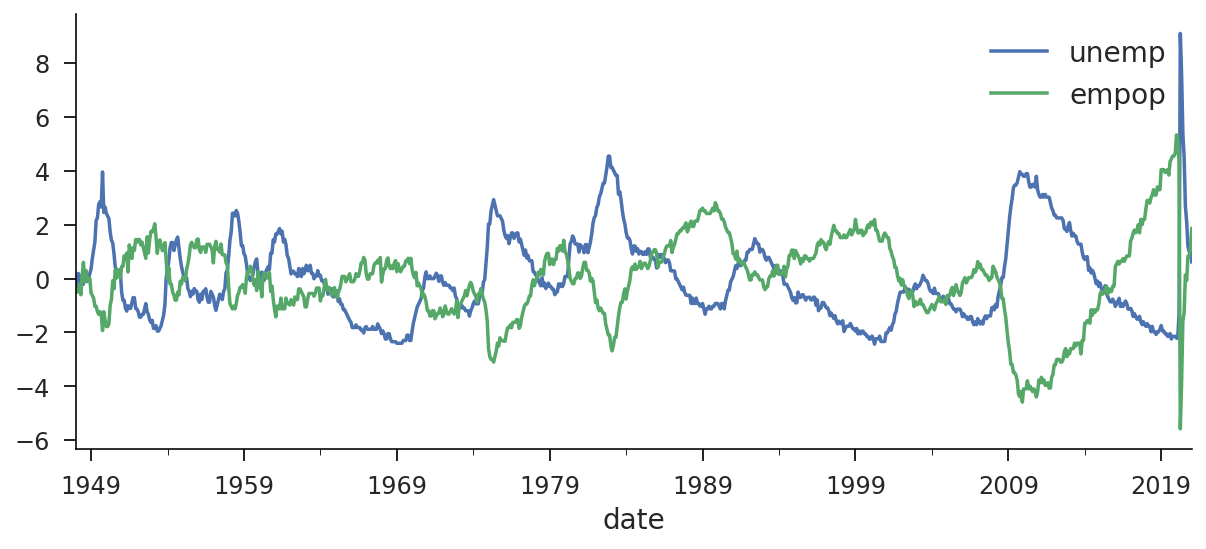

In [111]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [112]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

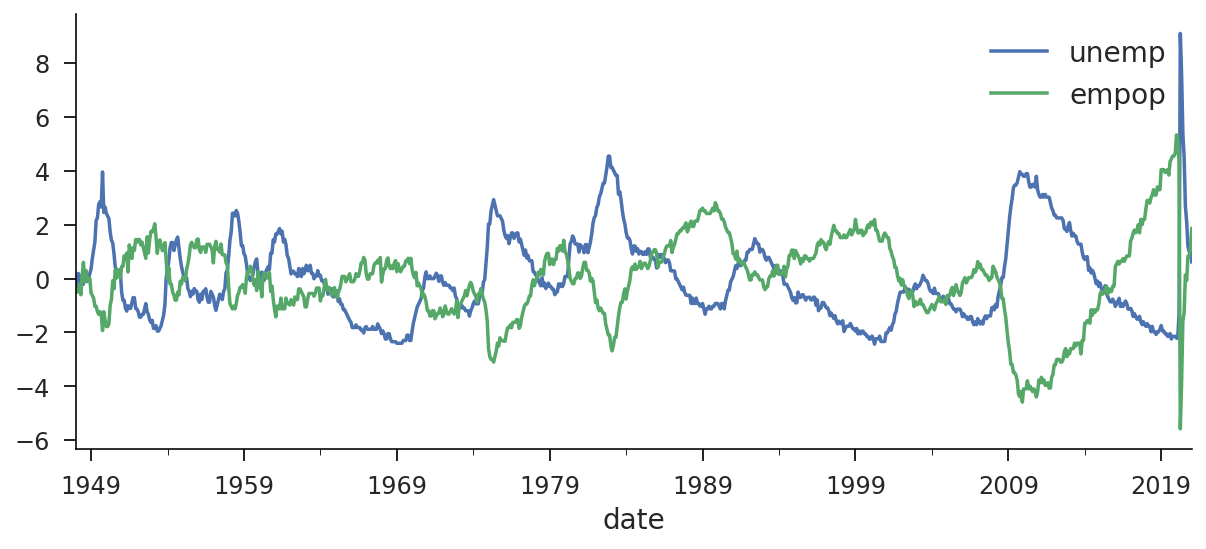

In [116]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

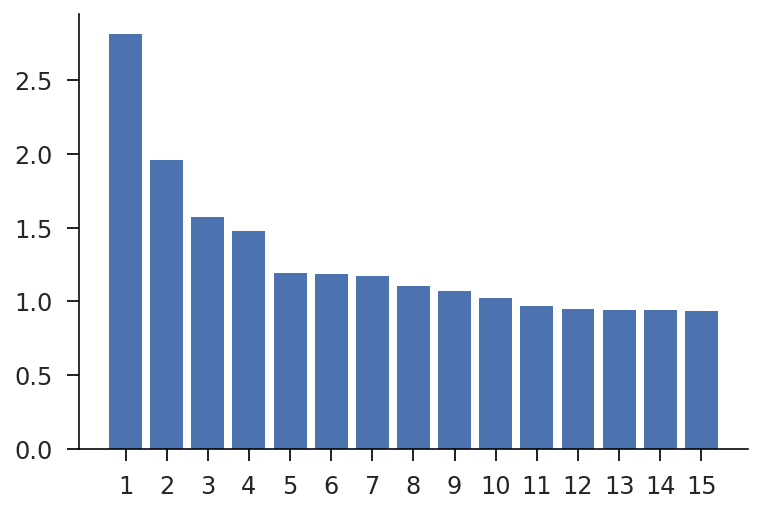

In [117]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

In [118]:
import statsmodels.formula.api as smf

## Basic

In [119]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [120]:
ret = smf.ols('z ~ 1 + x + y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     32.31
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.76e-11
Time:                        22:54:43   Log-Likelihood:                -390.11
No. Observations:                 100   AIC:                             786.2
Df Residuals:                      97   BIC:                             794.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8497      1.225      2.326      0.022       0.419       5.281
x              5.0816      1.202      4.227      0.000       2.695       7.468
y              2.5365      0.409      6.206      0.000       1.725       3.348
==============================================================================
Omnibus:                       19.508   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.204
Skew:                           0.630   Prob(JB):                     1.25e-11
Kurtosis:                       6.235   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
ret.params

Intercept    2.849707
x            5.081589
y            2.536530
dtype: float64

In [122]:
ret = smf.ols('z ~ 1 + x*y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8168.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          1.90e-115
Time:                        22:54:46   Log-Likelihood:                -138.33
No. Observations:                 100   AIC:                             284.7
Df Residuals:                      96   BIC:                             295.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9509      0.101      9.460      0.000       0.751       1.150
x              1.8063      0.101     17.860      0.000       1.605       2.007
y              3.0533      0.033     91.410      0.000       2.987       3.120
x:y            4.0455      0.033    121.113      0.000       3.979       4.112
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.178
Skew:                           0.026   Prob(JB):                        0.915
Kurtosis:                       2.800   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

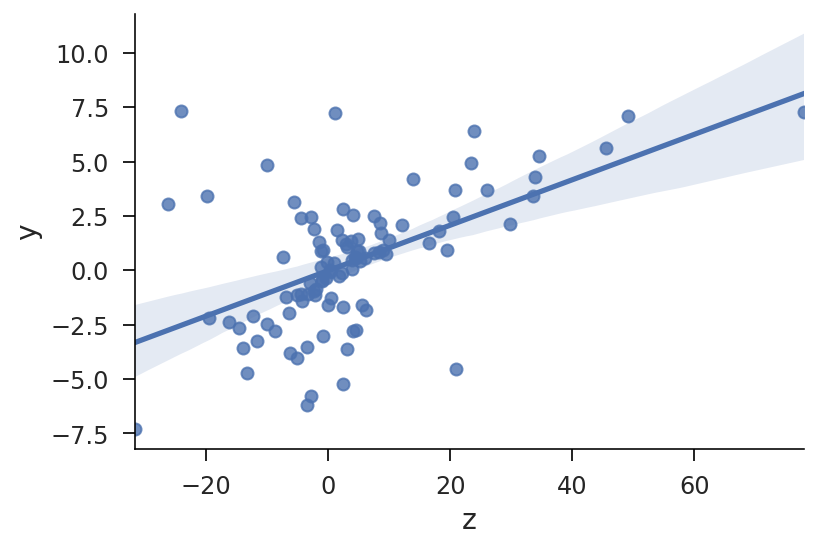

In [123]:
sns.regplot('z', 'y', data=df);

## Categorical

In [124]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [125]:
ret = smf.ols('value ~ 0 + C(block)', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     11.35
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           1.95e-06
Time:                        22:54:51   Log-Likelihood:                -8.6086
No. Observations:                 100   AIC:                             25.22
Df Residuals:                      96   BIC:                             35.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(block)[0]     0.1154      0.052      2.228      0.028       0.013       0.218
C(block)[1]     0.1925      0.053      3.647      0.000       0.088       0.297
C(block)[2]     0.4780      0.052      9.228      0.000       0.375       0.581
C(block)[3]     0.4398      0.060      7.307      0.000       0.320       0.559
==============================================================================
Omnibus:                       12.164   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.631
Skew:                          -0.486   Prob(JB):                     3.31e-05
Kurtosis:                       5.002   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
ret.params - cmean

C(block)[0]    0.015410
C(block)[1]   -0.007498
C(block)[2]    0.178015
C(block)[3]    0.039806
dtype: float64

In [127]:
stderr_reg = np.sqrt(ret.cov_params().values.diagonal())
stderr_rob = np.sqrt(ret.cov_HC0.diagonal())

## Bootstrapping

In [128]:
from sklearn.utils import resample

In [129]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [130]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
data0 = mygen()
mysamp = lambda: resample(data0)

In [131]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp0 = res.std().values

In [132]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mysamp()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [133]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_reg,0.051800,0.052787,0.051800,0.060186
stderr_rob,0.035209,0.015305,0.084284,0.042258
stderr_bsp0,0.040058,0.019831,0.103953,0.039086
stderr_bsp,0.040284,0.024852,0.077353,0.031869


In [134]:
(2*(1/(stderr_bsp0/cvars)))**2/N

array([0.99710594, 1.01713887, 0.92539628, 1.04730818])

## MAPS

In [5]:
import geopandas as gpd
from ipywidgets import interact, IntSlider

In [6]:
pref_hist = gpd.read_file('/media/totoro/data/china_maps/history/v6_time_pref_pgn_utf_wgs84.shp')
pref_hist = pref_hist.rename(columns={
    'NAME_CH': 'name_zh',
    'NAME_PY': 'name_en',
    'BEG_YR': 'beg_yr',
    'END_YR': 'end_yr'
})[['name_zh', 'name_en', 'beg_yr', 'end_yr', 'geometry']]
print(len(pref_hist))
pref_hist.head()

3830


,name_zh,name_en,beg_yr,end_yr,geometry
0,辽州,Liao Zhou,1151,1217,"POLYGON ((113.54941 36.75454, 113.54329 36.752..."
1,沁州,Qin Zhou,1129,1217,"MULTIPOLYGON (((112.00320 36.84234, 112.00954 ..."
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
3,南泽州,Nanzhe Zhou,1128,1150,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."
4,泽州,Zezhou Fu,1151,1217,"POLYGON ((113.23645 35.44530, 113.22804 35.444..."


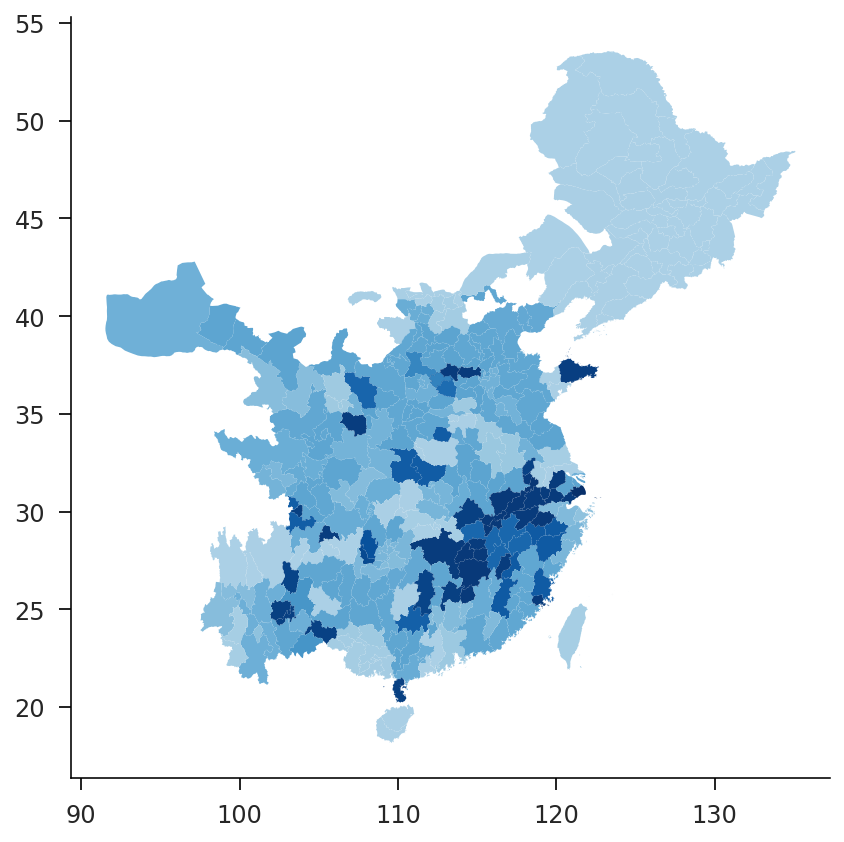

In [7]:
pref_1911 = pref_hist.query('beg_yr < 1911 and end_yr >= 1911')
pref_1911.plot(column='beg_yr', cmap='Blues_r', vmax=2200, figsize=(7, 7));

In [8]:
def plot_year(yr):
    df = pref_hist.query(f'beg_yr <= {yr} and end_yr >= {yr}')
    df['age'] = yr - df['beg_yr']
    yrmax = df['age'].max()
    fig, ax = plt.subplots(figsize=(7, 7))
    df.plot(column='age', cmap='Blues', ax=ax, vmin=-100, vmax=600);
    ax.set_xlim(85, 135)
    ax.set_ylim(15, 50)
    ax.set_aspect('equal')
interact(plot_year, yr=IntSlider(min=-224, max=1911, value=1900));

interactive(children=(IntSlider(value=1900, description='yr', max=1911, min=-224), Output()), _dom_classes=('w…

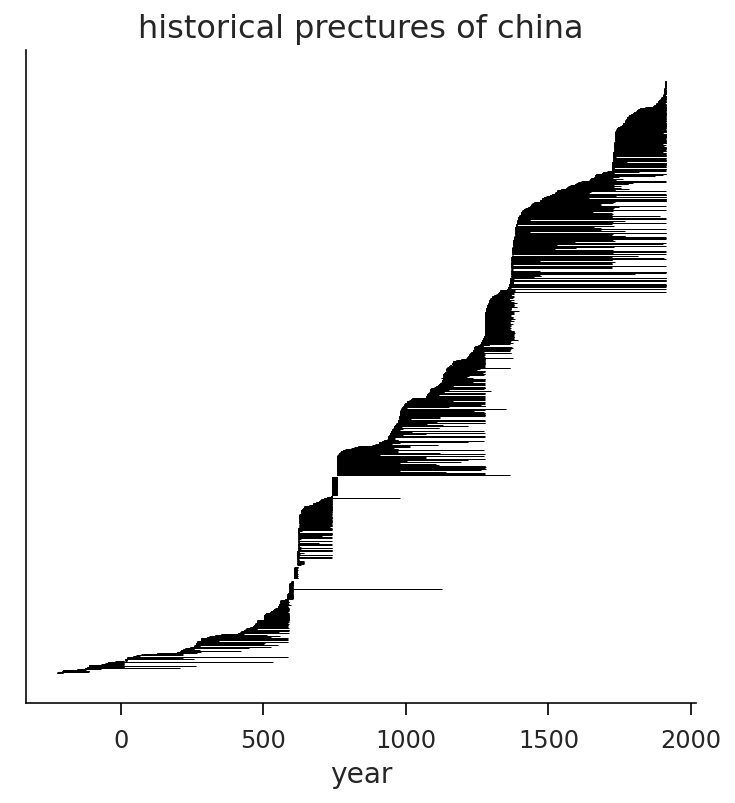

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref_hist.sort_values('beg_yr')[['beg_yr', 'end_yr']].set_index(np.arange(len(pref_hist)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

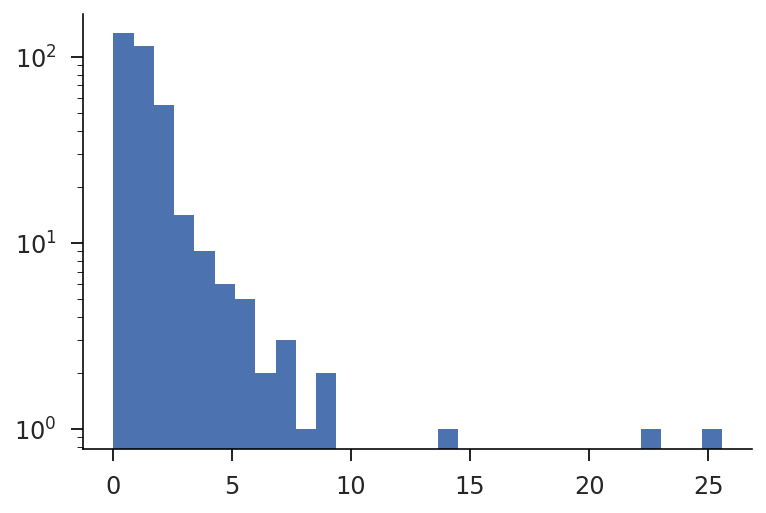

In [10]:
pref_hist.query('end_yr == 1911').area.hist(log=True, bins=30, grid=False);

### Advanced

In [11]:
year = 1776
pref_old = pref_hist.query(f'beg_yr <= {year} and end_yr >= {year}')
pref_old = pref_old[pref_old.is_valid]
pref_old.head()

,name_zh,name_en,beg_yr,end_yr,geometry
2,霍州,Huo Zhou,1772,1911,"MULTIPOLYGON (((111.85910 36.44626, 111.86777 ..."
184,郧阳府,Yunyang Fu,1476,1911,"POLYGON ((110.91881 31.66655, 110.90642 31.662..."
185,襄阳府,Xiangyang Fu,1476,1911,"POLYGON ((112.65113 31.66701, 112.65419 31.657..."
186,德安府,De'an Fu,1729,1911,"POLYGON ((113.91801 31.39151, 113.91645 31.384..."
187,汉阳府,Hanyang Fu,1763,1911,"POLYGON ((114.35085 30.68763, 114.35251 30.686..."


In [12]:
pref_new = gpd.read_file('/media/totoro/data/china_maps/modern/CHN_adm2.shp')
pref_new = pref_new.rename(columns={
    'NL_NAME_2': 'name_zh',
    'VARNAME_2': 'name_en',
})[['name_zh', 'name_en', 'geometry']]
pref_new.head()

,name_zh,name_en,geometry
0,安庆市,Ānqìng,"POLYGON ((117.11557 31.16616, 117.11788 31.160..."
1,蚌埠市,Bèngbù,"POLYGON ((117.26205 33.49959, 117.28395 33.497..."
2,亳州市,Bózhōu,"POLYGON ((115.73950 34.07428, 115.74284 34.072..."
3,巢湖市,Cháohú,"POLYGON ((118.36978 31.92897, 118.37383 31.924..."
4,池州市,Chízhōu,"POLYGON ((117.97800 30.82234, 117.97175 30.816..."


In [13]:
# choose a random modern prefecture
pref_samp = pref_new.query('name_zh == "成都市"')
name_zh, name_en = pref_samp.iloc[0][['name_zh', 'name_en']]
print(name_zh, name_en)

成都市 Chéngdū


In [15]:
inter

,name_en_1,name_zh_1,name_zh_2,name_en_2,geometry
0,Zi Zhou,资州,成都市,Chéngdū,"POLYGON ((103.96215 30.31100, 103.95975 30.317..."
1,Chengdu Lu,成都府,成都市,Chéngdū,"MULTIPOLYGON (((103.74436 31.41824, 103.74807 ..."
2,Tongchuan Fu,潼川府,成都市,Chéngdū,"MULTIPOLYGON (((104.89004 30.55391, 104.88743 ..."
3,Mei Zhou,眉州,成都市,Chéngdū,"MULTIPOLYGON (((103.45995 30.10803, 103.45782 ..."
4,Qiong Zhou,邛州,成都市,Chéngdū,"POLYGON ((103.43443 30.12657, 103.43441 30.126..."
5,Mao Zhou,茂州,成都市,Chéngdū,"MULTIPOLYGON (((103.44066 30.88518, 103.44066 ..."
6,Yazhou Fu,雅州府,成都市,Chéngdū,"MULTIPOLYGON (((103.36964 30.22435, 103.36969 ..."


In [17]:
# efficiently find the intersection with old provinces
xmin, ymin, xmax, ymax = pref_samp.iloc[[0]].total_bounds
old_subset = pref_old.cx[xmin:xmax, ymin:ymax]
print(len(old_subset))
inter = gpd.overlay(old_subset[['name_en', 'name_zh', 'geometry']], pref_samp, how='intersection')
print(inter[['name_en_1', 'name_zh_1']].drop_duplicates())

9
      name_en_1 name_zh_1
0       Zi Zhou        资州
1    Chengdu Lu       成都府
2  Tongchuan Fu       潼川府
3      Mei Zhou        眉州
4    Qiong Zhou        邛州
5      Mao Zhou        茂州
6     Yazhou Fu       雅州府


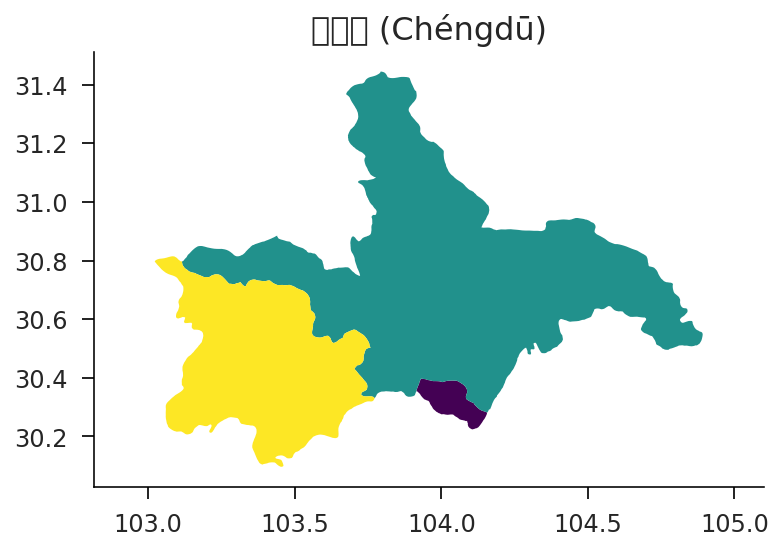

In [18]:
inter1 = inter[inter.area>0.001]
inter1['index'] = np.arange(len(inter1))
inter1.plot(column='index', cmap='viridis');
plt.title(f'{name_zh} ({name_en})');
plt.axis('equal');